In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
dreams = pd.read_csv("dreams.csv", index_col=0)

In [52]:
dreams.date = pd.to_datetime(dreams.date)

In [53]:
dreams["month"] = dreams.date.dt.month
dreams["quarter"] = dreams.date.dt.to_period("Q")
dreams["day"] = dreams.date.dt.weekday
dreams["characters"] = dreams.content.str.len()

In [54]:
content_filter = (dreams["content"] != "no memory") & (dreams["content"] != "weak memory")

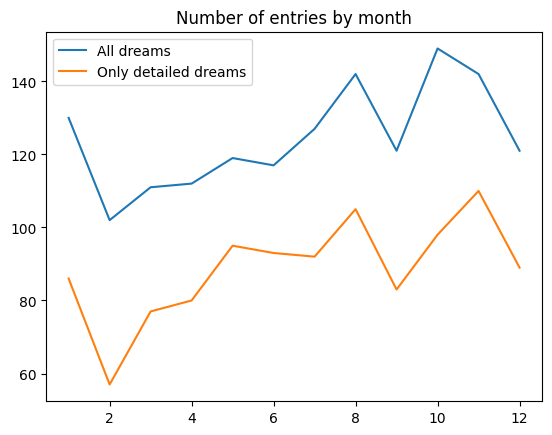

In [55]:
plt.plot(dreams.groupby("month").count()["date"])
plt.plot(dreams[content_filter].groupby("month").count()["date"])
plt.title("Number of entries by month")
plt.legend(["All dreams", "Only detailed dreams"]);

In [56]:
dreams.shape[0]

1493

In [57]:
dreams = dreams[content_filter]

In [58]:
dreams[(dreams.category.str.len() < 5) & (dreams.category != "[]")].category

Series([], Name: category, dtype: object)

In [59]:
from ast import literal_eval
dreams.people = dreams.people.apply(literal_eval)
dreams.female = dreams.female.apply(literal_eval)
dreams.category = dreams.category.apply(literal_eval)
dreams.locations = dreams.locations.apply(literal_eval)
dreams.entities = dreams.entities.apply(literal_eval)
dreams.people_tag = dreams.people_tag.apply(literal_eval)

In [60]:
gender = dreams.explode("female").groupby("female").count()["date"]
gender = gender.rename({False: "male", True: "female"})
gender

female
male      251
female    251
Name: date, dtype: int64

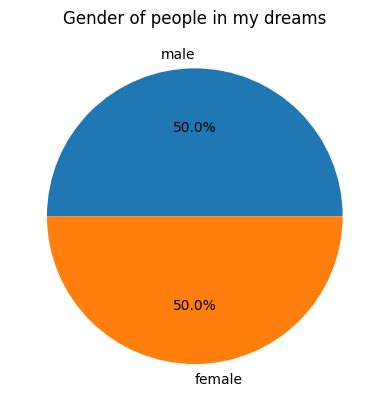

In [61]:
fig, ax = plt.subplots()
ax.pie(gender, labels=gender.index, autopct='%1.1f%%')
ax.set_title("Gender of people in my dreams");

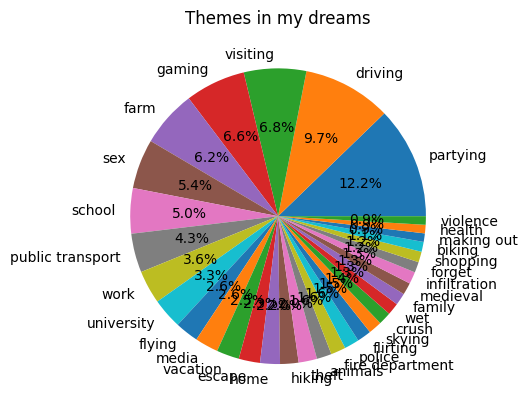

In [62]:

categories = dreams.explode("category").groupby("category").count()["date"].sort_values(ascending=False)
categories = categories[categories.values > 11]
fig, ax = plt.subplots()
ax.pie(categories, labels=categories.index, autopct='%1.1f%%')
ax.set_title("Themes in my dreams");

Text(0.5, 1.0, 'Dreams about partying by month')

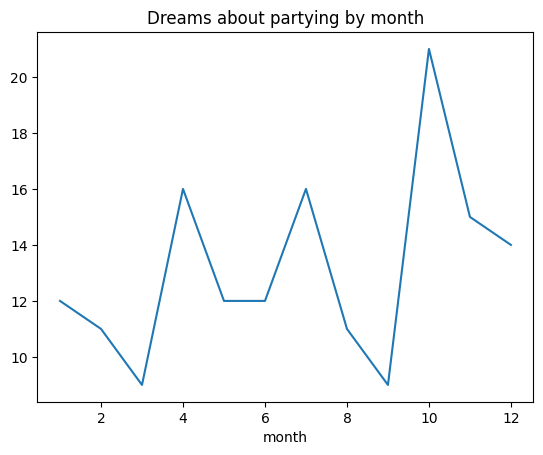

In [63]:
parties = dreams[dreams.category.apply(lambda x: "partying" in x)].groupby("month").count()["content"]
parties.plot()
plt.title("Dreams about partying by month")

Text(0.5, 1.0, 'Dreams about sex by quarter')

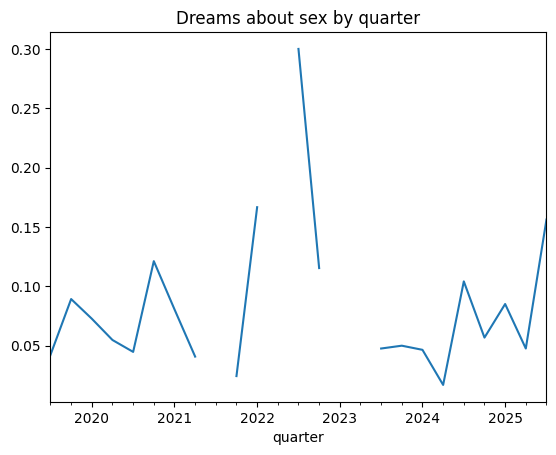

In [64]:
sex = dreams[dreams.category.apply(lambda x: "sex" in x)]
sex = sex.groupby("quarter").count()["content"] / dreams.groupby("quarter").count()["content"]
sex.plot()
plt.title("Dreams about sex by quarter")

In [65]:
sex = dreams[dreams.category.apply(lambda x: "partying" in x)]
sex.groupby("day").count()["date"]

day
0    18
1    26
2    25
3    26
4    32
5    21
6    10
Name: date, dtype: int64

In [66]:
dreams.groupby("day").mean(numeric_only=True)["characters"]

day
0    67.071429
1    54.125000
2    60.324675
3    79.804878
4    66.119497
5    74.943089
6    57.654867
Name: characters, dtype: float64

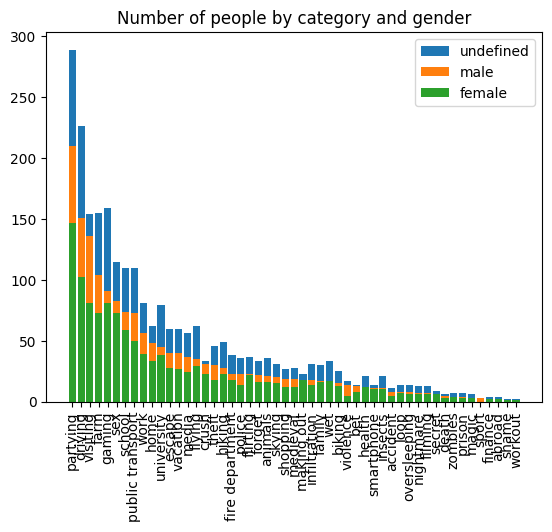

In [67]:
categories = dreams.explode("female")
categories = categories.explode("category")
categories.female = categories.female.astype(bool)
undefined = dreams[dreams.female.apply(lambda x: len(x)) == 0].explode("category")
gender = categories[categories.female.notna()]
female = gender[gender.female]
male = gender[~gender.female]
index = categories.groupby("category").count()["date"].sort_values(ascending=False).index
female = female.groupby("category").count()["date"]
female = female.reindex(index, fill_value=0)
male = male.groupby("category").count()["date"]
male = male.reindex(index, fill_value=0)
male += female
undefined = undefined.groupby("category").count()["date"]
undefined = undefined.reindex(index, fill_value=0)
undefined += male
plt.bar(index, undefined);
plt.bar(index, male);
plt.bar(index, female);
plt.xticks(rotation=90);
plt.legend(["undefined", "male", "female"])
plt.title("Number of people by category and gender");

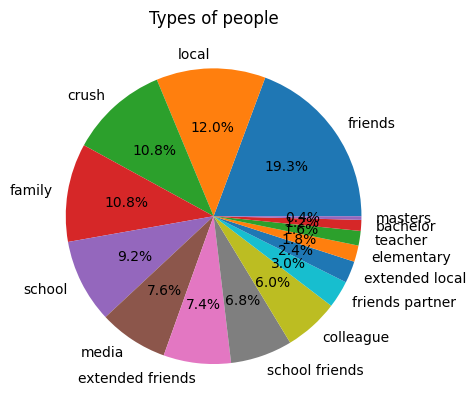

In [68]:
people_tag_count = dreams.explode("people_tag").groupby("people_tag").count()["date"].sort_values(ascending=False)
fig, ax = plt.subplots()
ax.pie(people_tag_count, labels=people_tag_count.index, autopct='%1.1f%%')
ax.set_title("Types of people");

In [69]:
people_tags = pd.get_dummies(dreams.set_index("date")["people_tag"].explode()).groupby("date").any()
people_tags

,bachelor,colleague,crush,elementary,extended friends,extended local,family,friends,friends partner,local,masters,media,school,school friends,teacher
date,,,,,,,,,,,,,,,
2019-07-13,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
2019-07-15,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2019-07-18,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
2019-07-21,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2019-07-25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-16,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False
2025-08-17,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2025-08-18,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False


In [70]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(grid, title=None):
    all_tags = grid.columns
    all_dates = grid.index

    fig, ax = plt.subplots(figsize=(10, 5))

    # Define a colormap: transparent for 0, color for 1
    cmap = plt.cm.get_cmap("tab20", len(all_tags))
    colors = {tag: cmap(i) for i, tag in enumerate(all_tags)}

    # Plot each cell
    for i, date in enumerate(grid.index):
        for j, tag in enumerate(grid.columns):
            val = grid.loc[date, tag]
            if val == 1:
                ax.add_patch(
                    plt.Rectangle(
                        (j - 0.5, i - 0.5),
                        1,
                        1,
                        color=colors[tag],
                        alpha=0.7,
                        edgecolor="gray",
                    )
                )

    # Customize the plot
    ax.set_xticks(range(len(all_tags)))
    ax.set_xticklabels(all_tags, rotation=45, ha="right")
    ax.set_yticks(range(len(grid.index)))
    ax.set_yticklabels(grid.index.strftime("%Y-%m-%d"))
    ax.set_xlim(-0.5, len(all_tags) - 0.5)
    ax.set_ylim(-0.5, len(grid.index) - 0.5)
    ax.grid(False)
    ax.invert_yaxis()

    for i, label in enumerate(ax.get_yticklabels()):
        if i % 22 != 0:  # Show every other label
            label.set_visible(False)
    if title:
        plt.title(title)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_29938/345756214.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(all_tags))
/tmp/ipykernel_29938/345756214.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle(


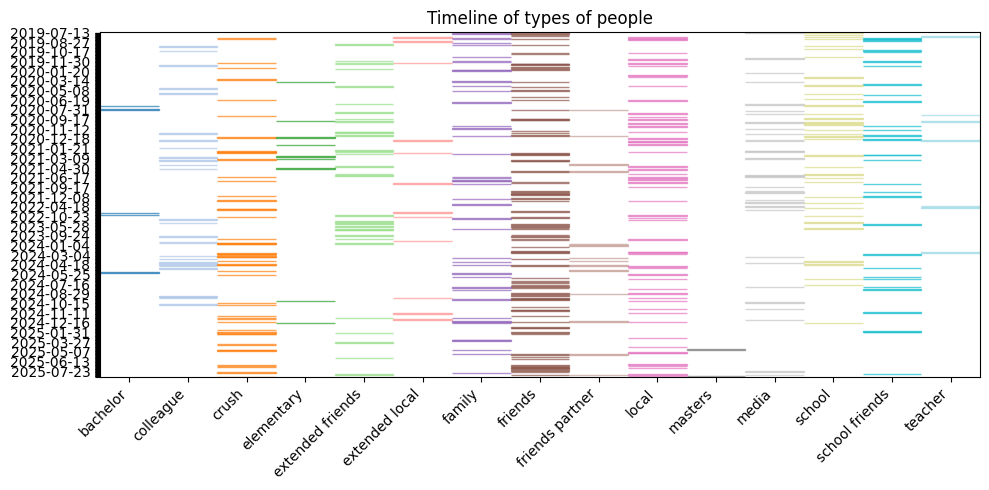

In [71]:
plot_grid(people_tags, "Timeline of types of people")

In [72]:
people = pd.get_dummies(dreams.set_index("date")["people"].explode()).groupby("date").any()
people_count = dreams.explode("people").groupby("people").count()["date"].sort_values(ascending=False)

In [73]:
# Personal data
break

SyntaxError: 'break' outside loop (2677806565.py, line 2)

In [ ]:
plot_grid(people[people_count.head(10).index], "Timeline of top 10 people")

In [ ]:
plot_grid(people[people_count.head(50).index], "Timeline of top 50 people")

In [ ]:
from mappings import people_map
crushes = []
for key, value in people_map.items():
    if value == "crush":
        crushes.append(key)

In [ ]:
plot_grid(people[crushes], "Timeline of my crushes")